In [1]:
#Import necessary python packages for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#Importing and reading dataset using pandas read_csv.
bike_data=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=['Date'])

In [3]:
#Get the shape of the data points and variables
bike_data.shape

(8760, 14)

In [4]:
#View first five rows of the dataset
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#Check for duplicate records in dataset
bike_data.duplicated().sum()

0

In [6]:
#Check for columns
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
#Get datatypes of variables.
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
#Get summary of the dataset(like min,max, count, 25th percentile,std, mean values for each variable)
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
#Check for null values.
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
#Since the variables having units with name, renaming columns for better variable analysis.
bike_data.rename(columns={'Rented Bike Count':'Rent_bike_c','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                          'Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_tem',
                         'Solar Radiation (MJ/m2)':'Solar_Rad','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
                         'Functioning Day':'Func_Day'},inplace=True)

In [11]:
#Check first 3 records from dataset.
bike_data.head(3)

,Date,Rent_bike_c,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_tem,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Func_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
#Get distinct categories/classes counts for Season categories
bike_data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [13]:
#Get distinct categories/classes counts for Holiday variable
bike_data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [14]:
#Get distinct categories/classes counts for Functioning Day variable
bike_data['Func_Day'].value_counts()

Yes    8465
No      295
Name: Func_Day, dtype: int64

In [15]:
#For better analysis of rented bike count derive few variables(like year,month and weekdasy) to see the trend and seasonality.
#Understand rented bike counts in months/days using barplots.
#Before that derive new variables as Year,Months and day.
bike_data['Year'] = bike_data.Date.dt.year
bike_data['Month'] = bike_data.Date.dt.month_name().str[:3]
bike_data['Weekdays'] = bike_data.Date.dt.weekday

In [16]:
#View first five records of dataframe
bike_data.head()

,Date,Rent_bike_c,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_tem,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Func_Day,Year,Month,Weekdays
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,3


In [17]:
#View bottom five records of dataframe.
bike_data.tail()

,Date,Rent_bike_c,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_tem,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Func_Day,Year,Month,Weekdays
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,4
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,4


In [18]:
#Mapping days to weekdays column
bike_data['Weekdays'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True)

In [19]:
#Ordering data based on categories.
bike_data["Weekdays"] = pd.Categorical(bike_data["Weekdays"], categories=['Monday','Tuesday','Wednesday',
                                                                        'Thursday','Friday','Saturday', 'Sunday'],ordered=True)

In [20]:
#View to 5 records from dataframe
bike_data.head()

,Date,Rent_bike_c,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_tem,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Func_Day,Year,Month,Weekdays
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday


In [21]:
#Inport seaborn package for data visualization
import seaborn as sns

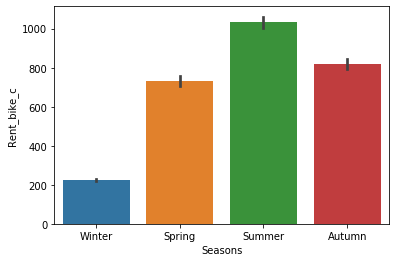

In [22]:
#Frequesncy of Rented bike counts in each season categories.
#From the below barchart its clearly shows that in summer season peoples are more likely to take rented bike 
#compared to other seasons, and in winter season less peoples take bike for rent. 
sns.barplot(data=bike_data,x='Seasons',y='Rent_bike_c')

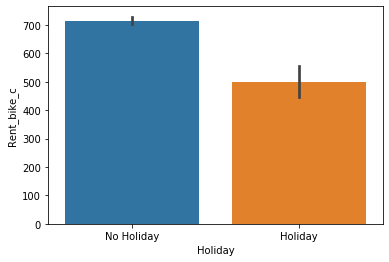

In [23]:
#Barplot Rented bike count VS Holiday
#From the below chart, here when there is no holiday people are taking more rented bikes.
#One thing we can understand from this is, more likely officials who are going to office or college studentes are using rented bikes
sns.barplot(data=bike_data,x='Holiday',y='Rent_bike_c')

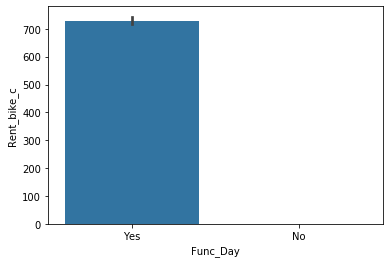

In [24]:
#Rented bike count vs Functioning day
sns.barplot(data=bike_data,x='Func_Day',y='Rent_bike_c')

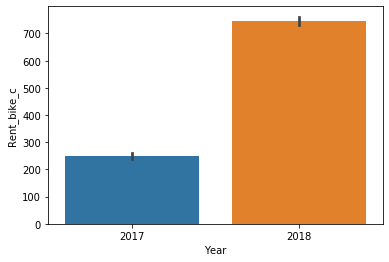

In [25]:
#Rented bike count VS Year
#Comparitively in 2018 more rentred bikes been used than 2017.
sns.barplot(data=bike_data,x='Year',y='Rent_bike_c')

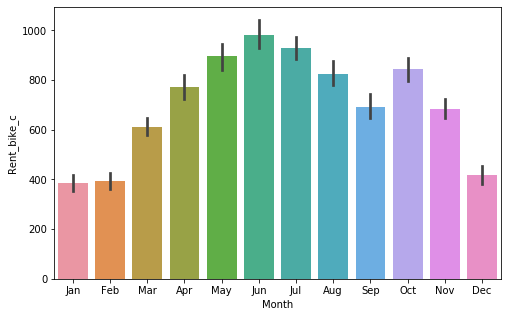

In [26]:
#Rented bike count in respective months
plt.figure(figsize=(8, 5))
sns.barplot(data=bike_data,x='Month',y='Rent_bike_c')

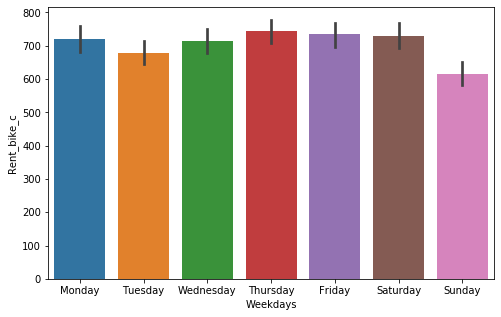

In [27]:
#Rented bike count in respective weekdays
#AS we can see here in weekdays rented bike count is more than weekends.
plt.figure(figsize=(8, 5))
sns.barplot(data=bike_data,x='Weekdays',y='Rent_bike_c')

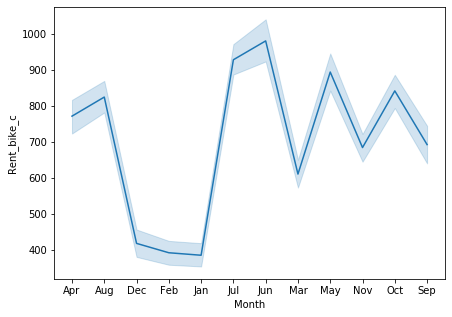

In [28]:
#Lineplot for Rented bike count VS Month to see the trend and seasonality.
plt.figure(figsize=(7, 5))
sns.lineplot(data=bike_data,x='Month',y='Rent_bike_c')

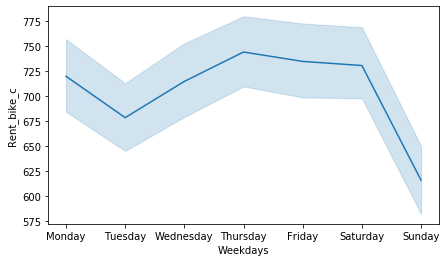

In [29]:
#Lineplot for Rented bike count VS Weekdays to see the trend and seasonality.
plt.figure(figsize=(7, 4))
sns.lineplot(data=bike_data,x='Weekdays',y='Rent_bike_c')

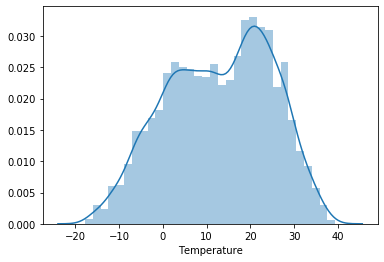

In [30]:
#Univariate Analysis to see the distribution of Temperature variable
sns.distplot(bike_data.Temperature)

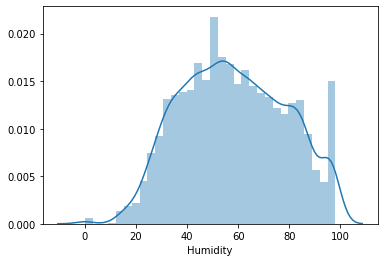

In [31]:
#Analysis to see the distribution of Humidity variable
sns.distplot(bike_data.Humidity)

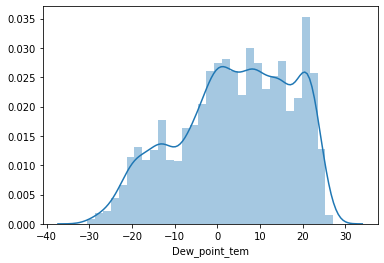

In [32]:
#Analysis to see the distribution of Dew_point_tem variable
sns.distplot(bike_data.Dew_point_tem)

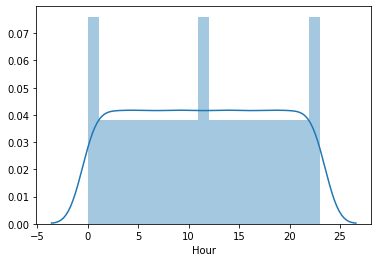

In [35]:
##Analysis to see the distribution of Hour variable
sns.distplot(bike_data.Hour)

In [36]:
bike_data.columns

Index(['Date', 'Rent_bike_c', 'Hour', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'Dew_point_tem', 'Solar_Rad', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Func_Day', 'Year', 'Month', 'Weekdays'],
      dtype='object')

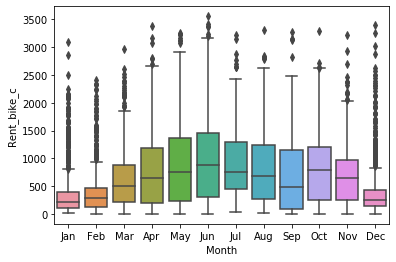

In [37]:
#Checking for outliers using boxplot for each months
sns.boxplot(data=bike_data,y="Rent_bike_c",x="Month")

In [38]:
Hour_week_agg = pd.DataFrame(bike_data.groupby(["Hour","Weekdays"],sort=True)["Rent_bike_c"].sum()).reset_index()

In [39]:
Hour_week_agg.head()

,Hour,Weekdays,Rent_bike_c
0,0,Monday,22267
1,0,Tuesday,28834
2,0,Wednesday,25117
3,0,Thursday,29942
4,0,Friday,28395


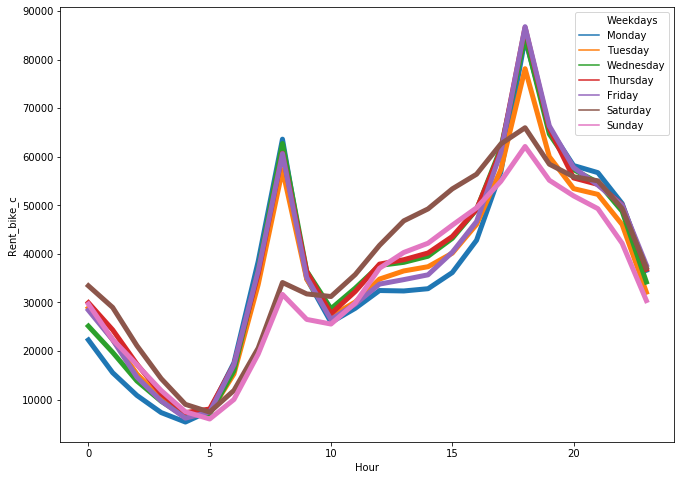

In [40]:
#Analysing the trend of weekdays and Rented bike count
plt.figure(figsize=(11, 8))
sns.lineplot(x=Hour_week_agg["Hour"],y=Hour_week_agg['Rent_bike_c'],hue=Hour_week_agg['Weekdays'],linewidth = 5)

In [41]:
Hour_Month_agg = pd.DataFrame(bike_data.groupby(["Hour","Month"],sort=True)["Rent_bike_c"].sum()).reset_index()

In [42]:
Hour_Month_agg.head()

,Hour,Month,Rent_bike_c
0,0,Apr,15774
1,0,Aug,21835
2,0,Dec,9879
3,0,Feb,8392
4,0,Jan,9759


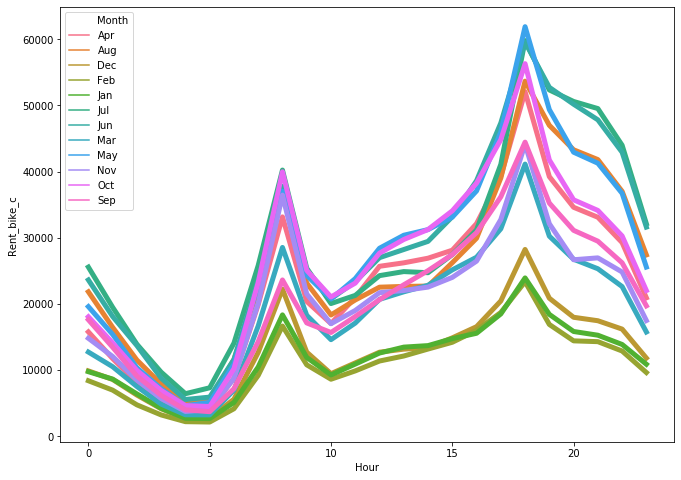

In [43]:
#Analysing the trend of Month and Rented bike count
plt.figure(figsize=(11, 8))
sns.lineplot(x=Hour_Month_agg["Hour"],y=Hour_Month_agg['Rent_bike_c'],hue=Hour_Month_agg['Month'],linewidth = 5)

In [44]:
Hour_Season_agg = pd.DataFrame(bike_data.groupby(["Hour","Seasons"],sort=True)["Rent_bike_c"].sum()).reset_index()

In [45]:
Hour_Season_agg.head()

,Hour,Seasons,Rent_bike_c
0,0,Autumn,56755
1,0,Spring,43298
2,0,Summer,82714
3,0,Winter,14866
4,1,Autumn,44200


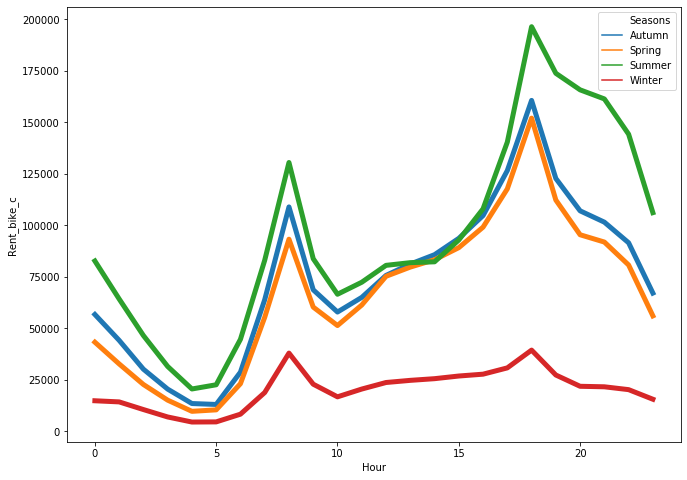

In [46]:
#Analysing the trend of Seasons and Rented bike count
plt.figure(figsize=(11, 8))
sns.lineplot(x=Hour_Season_agg["Hour"],y=Hour_Season_agg['Rent_bike_c'],hue=Hour_Season_agg['Seasons'],linewidth = 5)

In [47]:
bike_data.head()

,Date,Rent_bike_c,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_tem,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Func_Day,Year,Month,Weekdays
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday


In [48]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8760 non-null   datetime64[ns]
 1   Rent_bike_c    8760 non-null   int64         
 2   Hour           8760 non-null   int64         
 3   Temperature    8760 non-null   float64       
 4   Humidity       8760 non-null   int64         
 5   WindSpeed      8760 non-null   float64       
 6   Visibility     8760 non-null   int64         
 7   Dew_point_tem  8760 non-null   float64       
 8   Solar_Rad      8760 non-null   float64       
 9   Rainfall       8760 non-null   float64       
 10  Snowfall       8760 non-null   float64       
 11  Seasons        8760 non-null   object        
 12  Holiday        8760 non-null   object        
 13  Func_Day       8760 non-null   object        
 14  Year           8760 non-null   int64         
 15  Month          8760 n

In [49]:
bike_data.set_index(['Date'],inplace=True)

In [50]:
bike_data.head(3)

,Rent_bike_c,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_tem,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Func_Day,Year,Month,Weekdays
Date,,,,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday


In [52]:
#Creating dummy variables for categorical variables.
cat_cols = ['Seasons','Holiday','Func_Day','Month','Weekdays','Year']

bike_data = pd.get_dummies(bike_data,columns=cat_cols,drop_first=True,
                          prefix=cat_cols)

In [53]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [54]:
train_data,test_data = train_test_split(bike_data,test_size=0.25,random_state=42)

In [55]:
num_cols = ['Hour','Temperature','Humidity','WindSpeed','Visibility','Dew_point_tem',
            'Solar_Rad','Rainfall','Snowfall','Rent_bike_c']

In [56]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,RobustScaler
scaling = Normalizer()
train_data[num_cols] = scaling.fit_transform(train_data[num_cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
train_data.head(3)

,Rent_bike_c,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_tem,Solar_Rad,Rainfall,Snowfall,...,Month_Nov,Month_Oct,Month_Sep,Weekdays_Tuesday,Weekdays_Wednesday,Weekdays_Thursday,Weekdays_Friday,Weekdays_Saturday,Weekdays_Sunday,Year_2018
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-03,0.560701,0.006794,0.007247,0.006341,0.000996,0.827917,-0.005208,0.001055,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2018-03-01,0.068625,0.003005,-0.003356,0.024044,0.001202,0.997310,-0.007964,0.000000,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2018-10-20,0.407232,0.000000,0.005165,0.032451,0.000548,0.912729,0.002834,0.000000,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1


In [58]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rent_bike_c,6570.0,0.399228,0.276188,0.000000,0.139701,0.378806,0.630352,0.993749
Hour,6570.0,0.008829,0.010392,0.000000,0.003769,0.006666,0.009906,0.181313
Temperature,6570.0,0.009526,0.011956,-0.036010,0.002978,0.008299,0.013215,0.143278
Humidity,6570.0,0.057933,0.081279,0.000000,0.020385,0.030788,0.054335,0.909913
WindSpeed,6570.0,0.001354,0.001579,0.000000,0.000579,0.000950,0.001549,0.028928
Visibility,6570.0,0.851181,0.171074,0.099624,0.767774,0.915878,0.985871,0.999868
Dew_point_tem,6570.0,0.004063,0.012667,-0.048572,-0.003488,0.003147,0.008635,0.139223
Solar_Rad,6570.0,0.000344,0.000542,0.000000,0.000000,0.000008,0.000550,0.004687
Rainfall,6570.0,0.000356,0.003568,0.000000,0.000000,0.000000,0.000000,0.125030
Snowfall,6570.0,0.000151,0.001534,0.000000,0.000000,0.000000,0.000000,0.066602


In [59]:
corr = pd.DataFrame(train_data.corr())
corr.to_csv('bike_rent_count_corr.csv')

In [60]:
#Selecting target and input variables.
x_train = train_data.drop('Rent_bike_c',axis=1)
y_train = train_data['Rent_bike_c']

In [61]:
x_train.shape,y_train.shape

((6570, 32), (6570,))

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_train_pred = model.predict(x_train)

In [64]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean_squared_error is',mean_squared_error(y_train,y_train_pred))
print('r2_score is',r2_score(y_train,y_train_pred))

mean_squared_error is 0.00730191887642766
r2_score is 0.9042601236401301


In [65]:
import statsmodels.api as sm
x_train_all = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_all).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Rent_bike_c   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1929.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:14:17   Log-Likelihood:                 6838.5
No. Observations:                6570   AIC:                        -1.361e+04
Df Residuals:                    6537   BIC:                        -1.339e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2897      0.013     98.240      0.000       1.264       1.315
Hour                   0.9983      0.141      7.092      0.000       0.722       1.274
Temperature            9.6508      0.476     20.258      0.000       8.717      10.585
Humidity              -0.4058      0.028    -14.515      0.000      -0.461      -0.351
WindSpeed             -2.4880      1.021     -2.438      0.015      -4.489      -0.487
Visibility            -1.3471      0.007   -188.513      0.000      -1.361      -1.333
Dew_point_tem         -8.9802      0.462    -19.443      0.000      -9.886      -8.075
Solar_Rad             10.1409      2.547      3.982      0.000       5.148      15.134
Rainfall              -4.6629      0.355    -13.152      0.000      -5.358      -3.968
Snowfall               0.0682      0.846      0.081      0.936      -1.590       1.727
Seasons_Spring        -0.0376      0.004     -9.831      0.000      -0.045      -0.030
Seasons_Summer         0.0063      0.004      1.553      0.121      -0.002       0.014
Seasons_Winter        -0.1321      0.005    -26.405      0.000      -0.142      -0.122
Holiday_No Holiday     0.0350      0.005      6.986      0.000       0.025       0.045
Func_Day_Yes           0.2656      0.006     41.270      0.000       0.253       0.278
Month_Aug             -0.0021      0.006     -0.369      0.712      -0.013       0.009
Month_Dec             -0.0118      0.006     -1.920      0.055      -0.024       0.000
Month_Feb              0.0150      0.006      2.588      0.010       0.004       0.026
Month_Jan              0.0024      0.006      0.412      0.680      -0.009       0.014
Month_Jul              0.0097      0.006      1.712      0.087      -0.001       0.021
Month_Jun             -0.0110      0.006     -1.936      0.053      -0.022       0.000
Month_Mar              0.0033      0.005      0.641      0.522      -0.007       0.014
Month_May              0.0064      0.005      1.217      0.224      -0.004       0.017
Month_Nov             -0.0084      0.006     -1.459      0.145      -0.020       0.003
Month_Oct              0.0095      0.006      1.679      0.093      -0.002       0.021
Month_Sep              0.0197      0.006      3.441      0.001       0.008       0.031
Weekdays_Tuesday       0.0132      0.004      3.278      0.001       0.005       0.021
Weekdays_Wednesday     0.0154      0.004      3.823      0.000       0.007       0.023
Weekdays_Thursday      0.0146      0.004      3.591      0.000       0.007       0.023
Weekdays_Friday        0.0111      0.004      2.729      0.006       0.003       0.019
Weekdays_Saturday      0.0152      0.004      3.763      0.000       0.007       0.023
Weekdays_Sunday        0.0061      0.004      1.532      0.126      -0.002       0.014
Year_2018             -0.0505      0.0

In [66]:
#Dropping variables whos P value is greater than 0.05(Significant variables) and variables which have greater than 5 VIF value.
x_train_new =x_train.drop(['Snowfall','Month_Jan','Month_Mar','Month_Aug','Month_May','Seasons_Summer',
                           'Month_Oct','Weekdays_Sunday','Dew_point_tem','Month_Nov','WindSpeed','Month_Jul',
                            'Weekdays_Friday','Weekdays_Thursday','Weekdays_Wednesday','Year_2018',
                           'Func_Day_Yes','Holiday_No Holiday','Month_Dec','Weekdays_Tuesday','Month_Feb'],axis=1)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_new,y_train)
y_train_pred1 = model.predict(x_train_new)

In [68]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean_squared_error is',mean_squared_error(y_train,y_train_pred1))
print('r2_score is',r2_score(y_train,y_train_pred1))

mean_squared_error is 0.009737581394442068
r2_score is 0.8723246786871791


In [69]:
#Now we have all variables whose P value is less than 0.05.(all significant variable we have)
import statsmodels.api as sm
x_train_final = sm.add_constant(x_train_new)
lr = sm.OLS(y_train,x_train_final).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Rent_bike_c   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     4073.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:14:23   Log-Likelihood:                 5892.9
No. Observations:                6570   AIC:                        -1.176e+04
Df Residuals:                    6558   BIC:                        -1.168e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6336      0.007    223.134      0.000       1.619       1.648
Hour                  0.7314      0.158      4.618      0.000       0.421       1.042
Temperature           0.9904      0.166      5.977      0.000       0.666       1.315
Humidity             -0.4639      0.024    -19.469      0.000      -0.511      -0.417
Visibility           -1.4143      0.008   -178.545      0.000      -1.430      -1.399
Solar_Rad            28.3109      2.413     11.731      0.000      23.580      33.042
Rainfall             -4.9860      0.392    -12.730      0.000      -5.754      -4.218
Seasons_Spring       -0.0263      0.003     -8.461      0.000      -0.032      -0.020
Seasons_Winter       -0.0728      0.004    -18.016      0.000      -0.081      -0.065
Month_Jun            -0.0279      0.005     -6.001      0.000      -0.037      -0.019
Month_Sep            -0.0342      0.005     -7.545      0.000      -0.043      -0.025
Weekdays_Saturday     0.0132      0.003      3.791      0.000       0.006       0.020
==============================================================================
Omnibus:                      587.052   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.320
Skew:                          -0.774   Prob(JB):                    6.50e-167
Kurtosis:                       3.633   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#Check for multicollinearity between variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x_train):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x_train.columns
    vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    return vif

In [71]:
calc_vif(x_train_final)

,variables,VIF
0,const,36.097527
1,Hour,1.824042
2,Temperature,2.643109
3,Humidity,2.525627
4,Visibility,1.236606
5,Solar_Rad,1.150038
6,Rainfall,1.314885
7,Seasons_Spring,1.228215
8,Seasons_Winter,2.015653
9,Month_Jun,1.094993


Testing data

In [72]:
test_data[num_cols] = scaling.transform(test_data[num_cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [73]:
test_cols = x_train_final.columns

In [74]:
x_test = test_data[test_cols[1:]]
y_test = test_data['Rent_bike_c']

In [75]:
x_test = sm.add_constant(x_test)

In [76]:
test_col = x_train_final.columns
x_test=x_test[test_col[1:]]
# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Rent_bike_c   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     4073.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:14:30   Log-Likelihood:                 5892.9
No. Observations:                6570   AIC:                        -1.176e+04
Df Residuals:                    6558   BIC:                        -1.168e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6336      0.007    223.134      0.000       1.619       1.648
Hour                  0.7314      0.158      4.618      0.000       0.421       1.042
Temperature           0.9904      0.166      5.977      0.000       0.666       1.315
Humidity             -0.4639      0.024    -19.469      0.000      -0.511      -0.417
Visibility           -1.4143      0.008   -178.545      0.000      -1.430      -1.399
Solar_Rad            28.3109      2.413     11.731      0.000      23.580      33.042
Rainfall             -4.9860      0.392    -12.730      0.000      -5.754      -4.218
Seasons_Spring       -0.0263      0.003     -8.461      0.000      -0.032      -0.020
Seasons_Winter       -0.0728      0.004    -18.016      0.000      -0.081      -0.065
Month_Jun            -0.0279      0.005     -6.001      0.000      -0.037      -0.019
Month_Sep            -0.0342      0.005     -7.545      0.000      -0.043      -0.025
Weekdays_Saturday     0.0132      0.003      3.791      0.000       0.006       0.020
==============================================================================
Omnibus:                      587.052   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.320
Skew:                          -0.774   Prob(JB):                    6.50e-167
Kurtosis:                       3.633   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y_pred_test = lr.predict(x_test)

In [80]:
r2_score(y_test, y_pred_test)

0.8746080199211311

In [81]:
mean_squared_error(y_test, y_pred_test)

0.00943932087414814

Random Forest

In [82]:
x_train_rf = x_train_final.drop('const',axis=1)
x_test_rf = x_test.drop('const',axis=1)

In [83]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
rf = RandomForestRegressor(max_depth=3,n_estimators = 700, random_state = 0)
 
# fit the regressor with x and y data
rf.fit(x_train_rf, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [84]:
y_train_pred = rf.predict(x_train_rf)

In [85]:
r2_score(y_train,y_train_pred)

0.9592869672704996

In [86]:
y_test_pred = rf.predict(x_test_rf)

In [87]:
r2_score(y_test,y_test_pred)

0.9626970054842539

In [89]:
# Save model
import pickle
with open('randomForest.sav', 'wb') as f:
    pickle.dump(rf, f)